In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.4.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',\
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

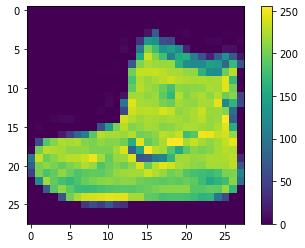

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0


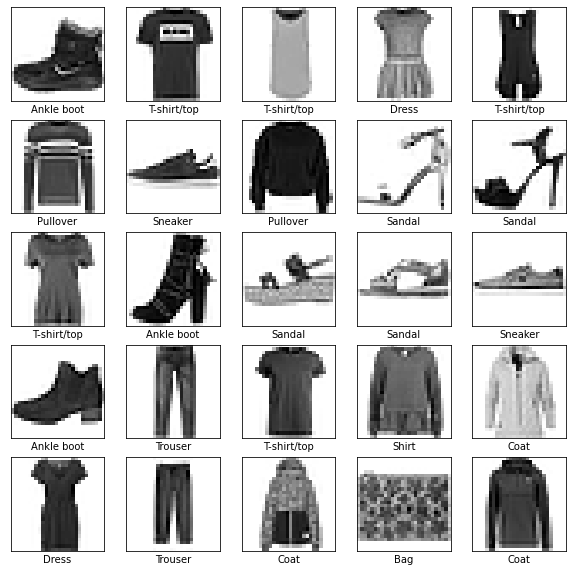

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 1ms/step - loss: 0.6419 - accuracy: 0.7748
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3896 - accuracy: 0.8580
Epoch 3/5
1875/1875 [==============================] - 2s 989us/step - loss: 0.3441 - accuracy: 0.8753
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3135 - accuracy: 0.8840
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2946 - accuracy: 0.8909


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)


313/313 - 0s - loss: 0.3706 - accuracy: 0.8659


In [13]:
print("\nTest accracy:", test_acc)


Test accracy: 0.8658999800682068


In [14]:
predictions = model.predict(test_images)


In [15]:
predictions[0]

array([4.8243408e-05, 1.4907872e-07, 1.7138010e-06, 5.8509282e-09,
       4.2391889e-07, 6.0941023e-03, 4.5090505e-06, 4.5165010e-03,
       1.1189534e-04, 9.8922241e-01], dtype=float32)

In [16]:
np.argmax(predictions[1])

2

In [17]:
test_labels[1]

2

In [20]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}%({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]), color=color)
                                        
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


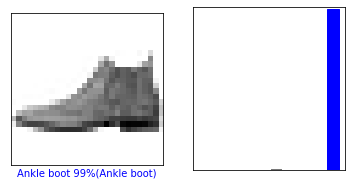

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,test_labels)
plt.show()

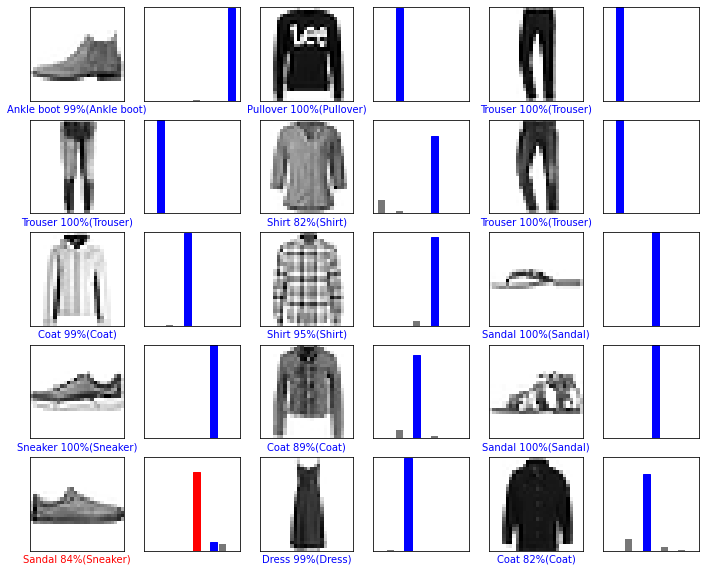

In [22]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

plt.show()


In [23]:
img = test_images[0]

In [24]:
img.shape

(28, 28)